#### **Project Title:**  ***" Predicting Employee Attrition "***
##### **Dataset:** *"IBM HR Analytics Dataset"*
##### **Step 01:** Loading Important Libraries

In [1]:
#Data manipulation and analysis.
import pandas as pd  
#Numerical operations.
import numpy as np  
#Plotting.
import matplotlib.pyplot as plt  
#Statistical data visualization.
import seaborn as sns  
#Data splitting.
from sklearn.model_selection import train_test_split  
#Preprocessing tools.
from sklearn.preprocessing import LabelEncoder, StandardScaler  
#Logistic regression model.
from sklearn.linear_model import LogisticRegression  
#Random Forest model.
from sklearn.ensemble import RandomForestClassifier  
#Evaluation metrics.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
#SHAP library for model explainability.
import shap  

##### **Step 02:** Loading Dataset & Performing EDA

Dataset Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

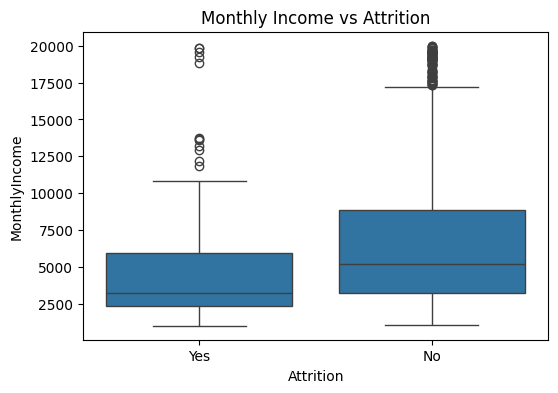

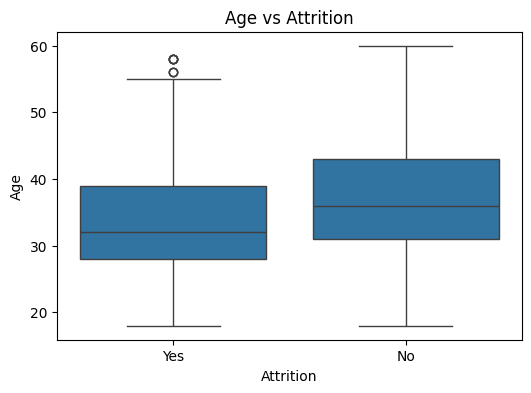

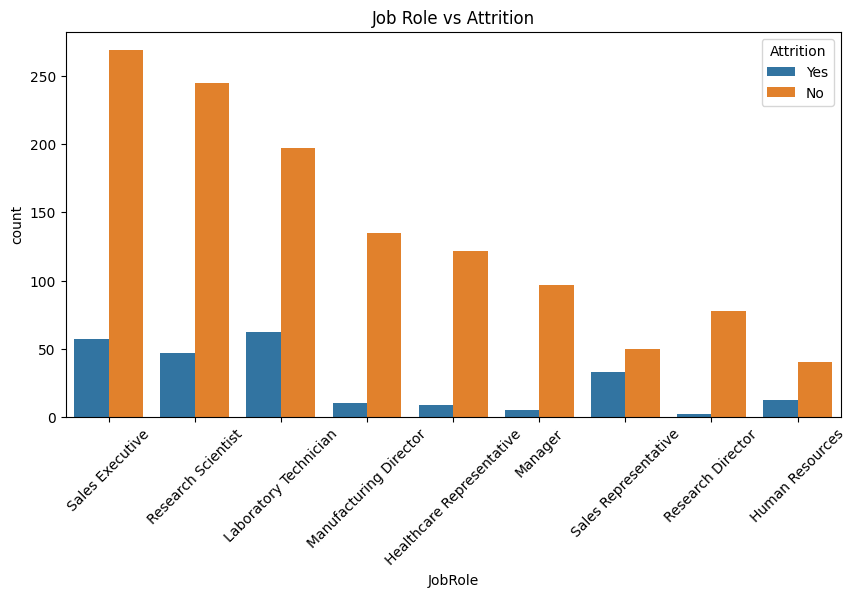

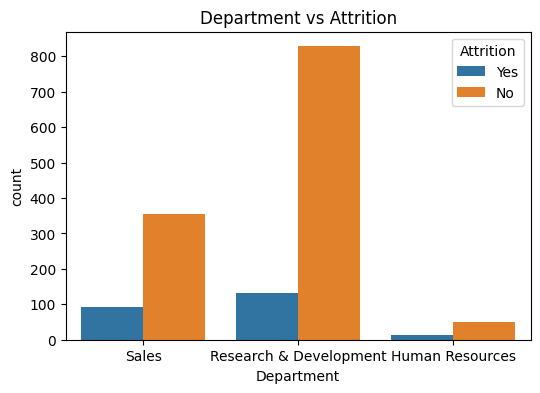

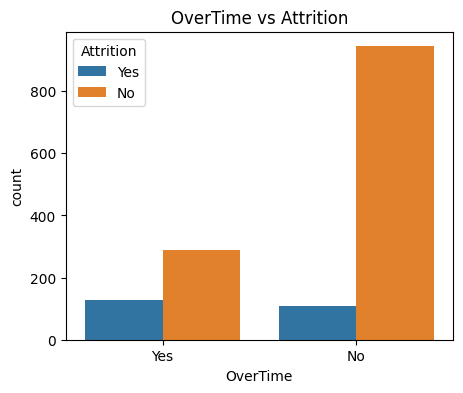

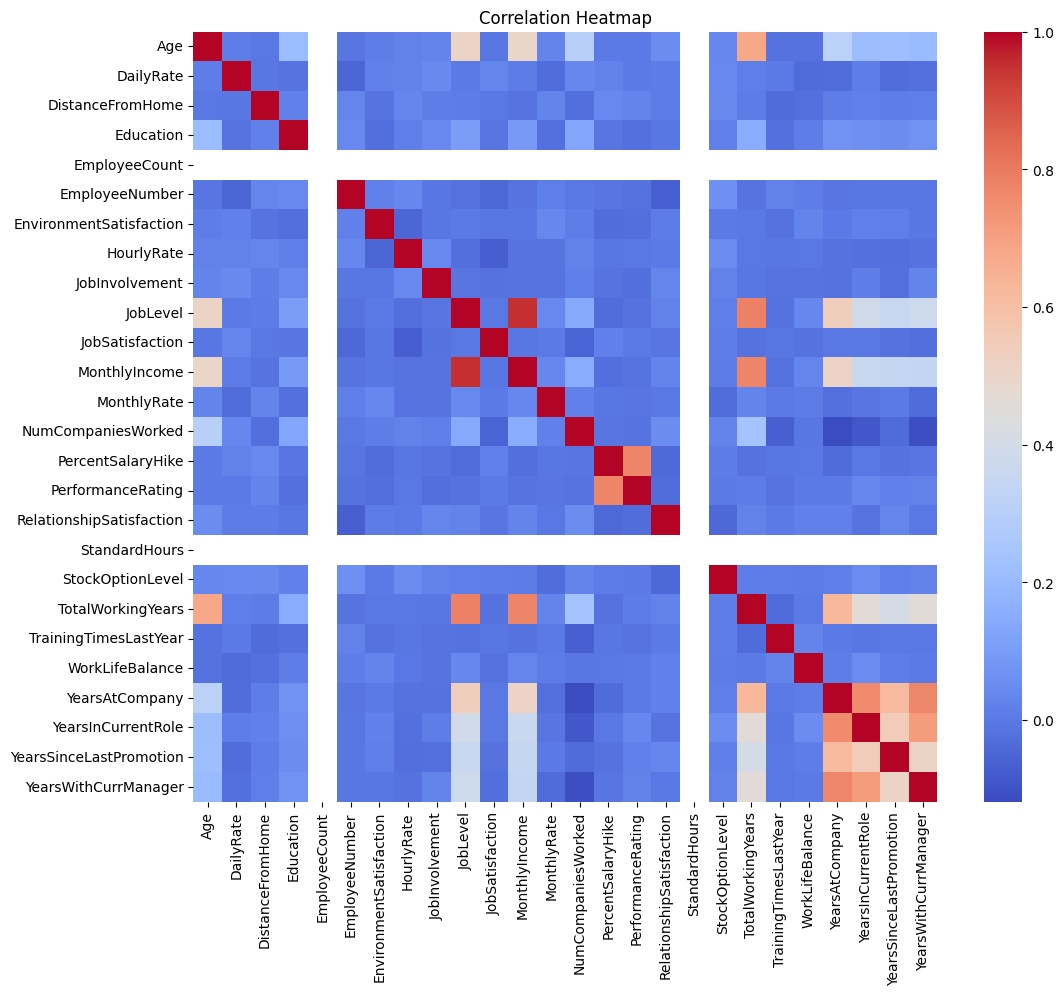

In [ ]:
#Load dataset.
df = pd.read_csv("ibm_hr_analystics_dataset.csv")
#Basic Info.
print("Dataset Shape:", df.shape)
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
#Target Variable Distribution.
print("\nAttrition Distribution:\n", df['Attrition'].value_counts(normalize=True))
#Boxplot: Monthly Income vs Attrition.
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()
#Boxplot: Age vs Attrition.
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()
#Countplot: Job Role vs Attrition.
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Job Role vs Attrition')
plt.xticks(rotation=45)
plt.show()
#Countplot: Department vs Attrition.
plt.figure(figsize=(6,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Department vs Attrition')
plt.show()
#Countplot: OverTime vs Attrition.
plt.figure(figsize=(5,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.show()
#Correlation Heatmap (Numerical Columns).
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### **Step 03:** Training Classification Models

In [ ]:
#Drop irrelevant columns.
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)
#Encode categorical variables.
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
#Features and target.
X = df.drop('Attrition', axis=1)
y = df['Attrition']
#Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Feature scaling for Logistic Regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
# --- Random Forest Classifier ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)  # No scaling needed
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Results:
Accuracy: 0.8741496598639455
Confusion Matrix:
 [[239   8]
 [ 29  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294


Random Forest Results:
Accuracy: 0.8435374149659864
Confusion Matrix:
 [[242   5]
 [ 41   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



##### **Step 04:** Model Predictions

<Figure size 640x480 with 0 Axes>

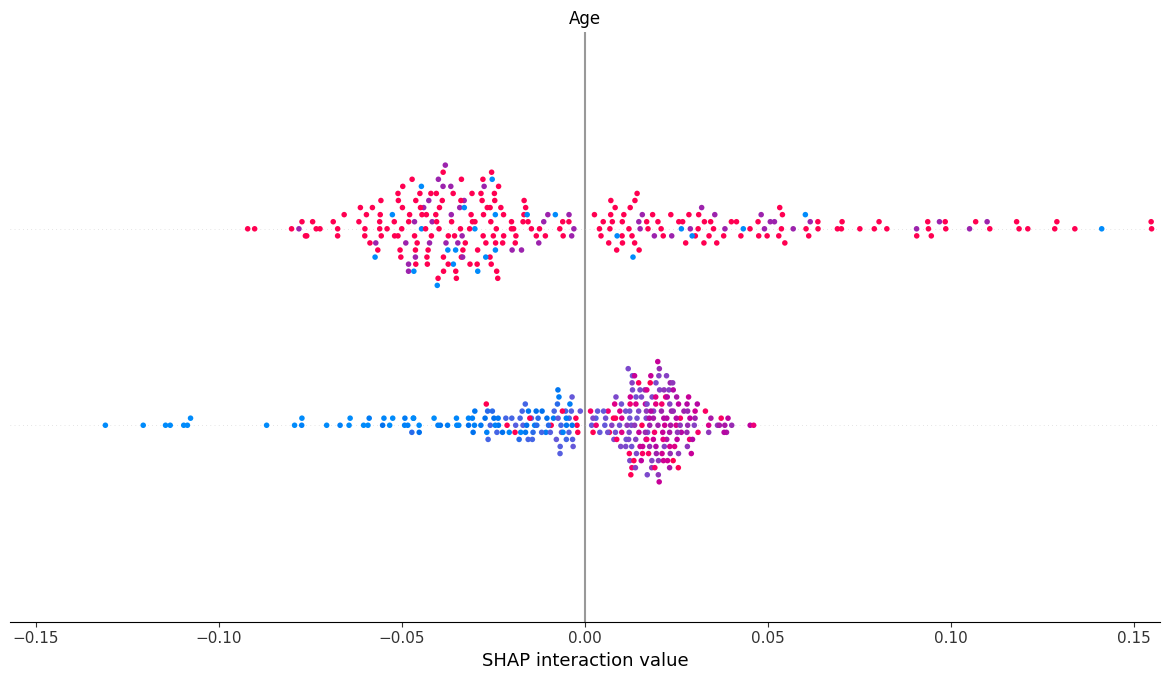

<Figure size 640x480 with 0 Axes>

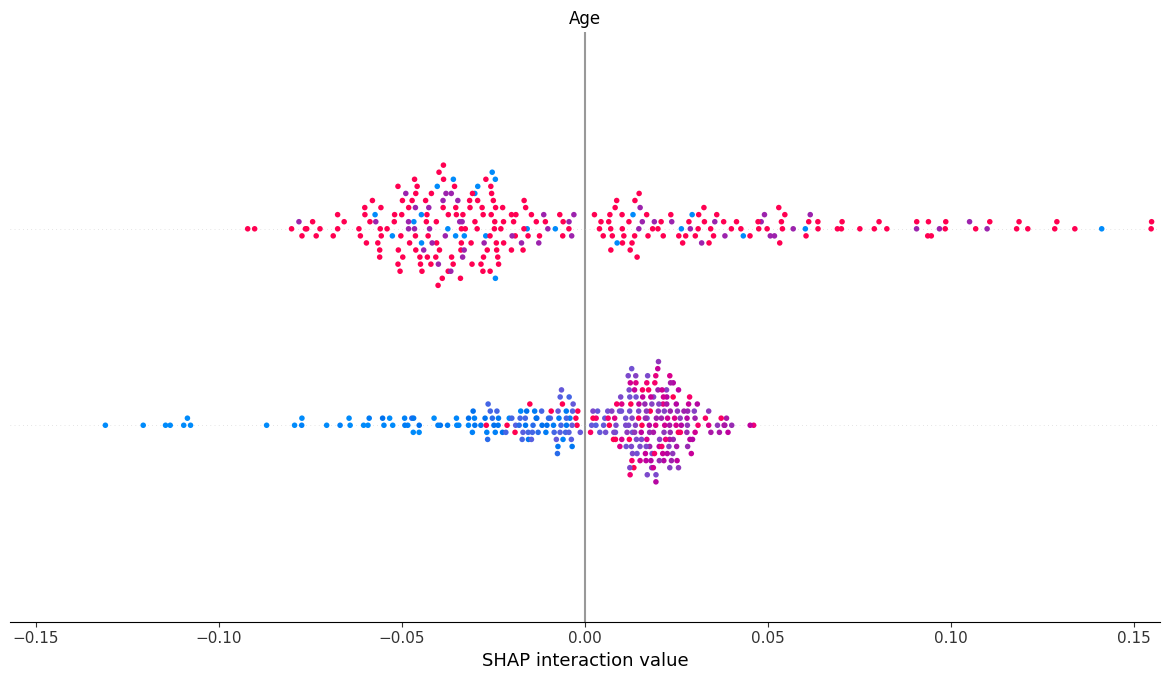

In [ ]:
#Load and preprocess the dataset.
df = pd.read_csv("ibm_hr_analystics_dataset.csv")
#Convert 'Yes'/'No' to binary (1/0).
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})  
#Drop unnecessary columns.
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True) 
#Encode categorical features using LabelEncoder.
le = LabelEncoder()  
#Loop through categorical columns.
for col in df.select_dtypes(include='object').columns:  
    #Apply LabelEncoder to each categorical column.
    df[col] = le.fit_transform(df[col])  
#Split data into features (X) and target (y).
#Features (excluding 'Attrition').
X = df.drop("Attrition", axis=1)  
#Target variable ('Attrition').
y = df["Attrition"]  
#Split the dataset into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Train the Random Forest Classifier.
#Initialize the model with 100 trees.
model = RandomForestClassifier(n_estimators=100, random_state=42)  
#Train the model.
model.fit(X_train, y_train)  
#SHAP analysis for model explainability.
#Initialize SHAP explainer.
explainer = shap.Explainer(model, X_train)  
#Get SHAP values for test data.
shap_values = explainer(X_test)  
#Visualizations to interpret model results.
#Summary plot (bar chart - global feature importance).
shap.summary_plot(shap_values, X_test, plot_type="bar")
#Beeswarm plot (impact per feature per prediction)
shap.summary_plot(shap_values, X_test)

### Conclusion

A **classification model** was successfully built to predict **employee attrition** using HR data.  
SHAP analysis revealed key factors such as **OverTime**, **Monthly Income** and **Job Satisfaction** as top contributors to attrition.  

These **explainable insights** empower the HR team to design effective **retention strategies**, enabling proactive interventions to reduce employee turnover.
***
